<a href="https://colab.research.google.com/github/srujannayak32/MLLAB189/blob/main/ML_ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Regression CO1,2 B4
For this exercise, you will experiment with regression, regularization, and cross-validation. Choose
appropriate Dataset.

(a) Load the data into memory. Make an appropriate X matrix and y vector.

In [3]:
df = pd.read_csv("/content/drive/MyDrive/MLLAB DATASETS/diabetes_DT.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [5]:
df['target'] = (df['Outcome'] > 0).astype(int)
df = df.drop('Outcome', axis=1)
print(df[['target']].value_counts())

target
0         500
1         268
Name: count, dtype: int64


In [6]:
X = df.drop('target', axis=1)
y = df['target']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
y

,target
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


(b) Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which will be used for training + validation, and a testing set Xtest, ytest) (containing remaining instances).

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
)

(c) Give the objective of logistic regression with L2 regularization.

Logistic regression predicts the probability of a binary outcome.

1.Logistic regression predicts the probability of a binary outcome.
2.L2 regularization is used to fix the problem of overfitting
3.L2 regularization reduces the weights of the coefficients of the model but never makes them 0
4.objective function of logistic regression with L2 regularization is to minimize the cross-entropy loss plus a penalty proportional to the sum of squares of the weights.
5.This encourages the model to fit the data well while keeping the weights small, which improves generalization on unseen data.




(d) Run logistic regression on the data using L2 regularization, varying the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data and the testing data (averaged over all instances), as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third graph the actual values of the weights obtained (one curve per weight). Finally, plot on a graph the accuracy on the training and test set. Explain briefly what you see.

In [9]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

lambdas = [0, 0.1, 1, 10, 100, 1000]

train_loss = []
test_loss = []
weight_norms = []
all_weights = []
train_acc = []
test_acc = []

for lam in lambdas:
    # In sklearn, regularization strength C = 1 / lambda
    C = 1e12 if lam == 0 else 1/lam  # Avoid division by zero for lambda=0
    model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)

    # Predictions
    y_train_prob = model.predict_proba(X_train)[:,1]
    y_test_prob = model.predict_proba(X_test)[:,1]
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Cross-entropy loss
    train_loss.append(log_loss(y_train, y_train_prob))
    test_loss.append(log_loss(y_test, y_test_prob))

    # L2 norm of weight vector
    w = model.coef_.flatten()
    weight_norms.append(np.linalg.norm(w))
    all_weights.append(w)

    # Accuracy
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))


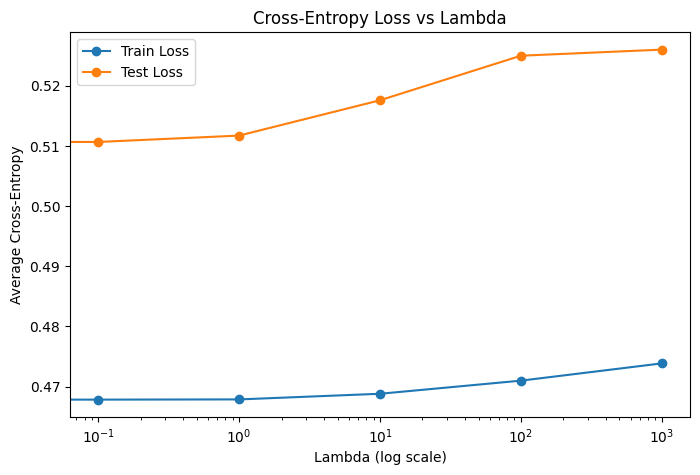

In [10]:
# Convert list of weight vectors to array for plotting each weight
all_weights = np.array(all_weights)

# Plot 1: Cross-entropy vs lambda
plt.figure(figsize=(8,5))
plt.plot(lambdas, train_loss, marker='o', label='Train Loss')
plt.plot(lambdas, test_loss, marker='o', label='Test Loss')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Average Cross-Entropy')
plt.title('Cross-Entropy Loss vs Lambda')
plt.legend()
plt.show()

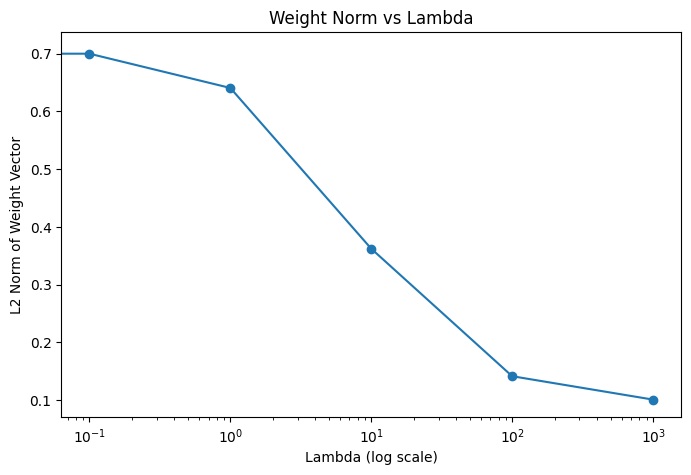

In [11]:
# Plot 2: L2 norm of weight vector vs lambda
plt.figure(figsize=(8,5))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('L2 Norm of Weight Vector')
plt.title('Weight Norm vs Lambda')
plt.show()

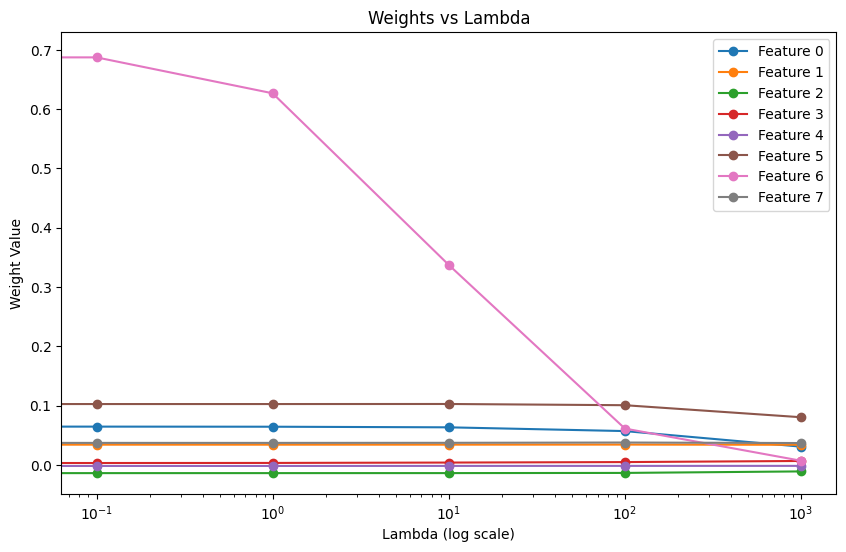

In [12]:
# Plot 3: Actual weights vs lambda
plt.figure(figsize=(10,6))
for i in range(all_weights.shape[1]):
    plt.plot(lambdas, all_weights[:,i], marker='o', label=f'Feature {i}')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Weight Value')
plt.title('Weights vs Lambda')
plt.legend()
plt.show()

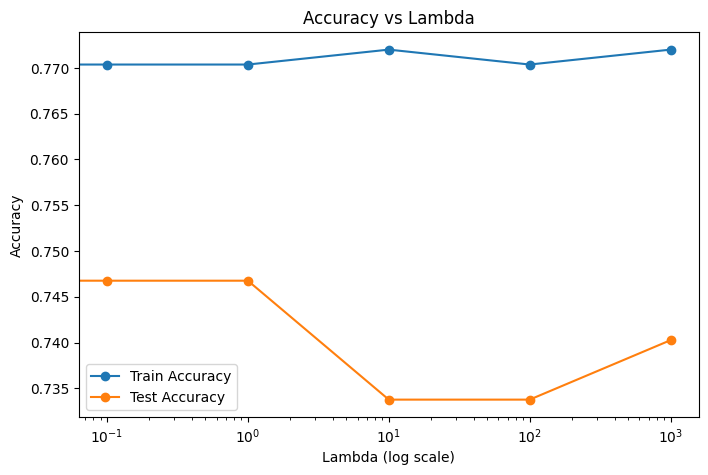

In [13]:
# Plot 4: Accuracy vs lambda
plt.figure(figsize=(8,5))
plt.plot(lambdas, train_acc, marker='o', label='Train Accuracy')
plt.plot(lambdas, test_acc, marker='o', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Lambda')
plt.legend()
plt.show()

(e) Re-format the data in the following way: take each of the input variables, and feed it through a set of Gaussian basis functions, defined as follows. For each variable (except the bias term), use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ. You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.

In [14]:
def gaussian_basis(X, num_bases=5, sigma=1.0, feature_range=(-10,10)):
    n_samples, n_features = X.shape
    means = np.linspace(feature_range[0], feature_range[1], num_bases)

    X_transformed = []

    for i in range(n_features):
        # Apply each basis function to feature i
        for mu in means:
            phi = np.exp(-(X[:,i] - mu)**2 / (2 * sigma**2))
            X_transformed.append(phi)

    # Stack all basis features horizontally
    return np.column_stack(X_transformed)

In [15]:
print("Original X_train shape:", X_train.shape)
for sigma in [0.1, 0.5, 1, 5, 10]:
    X_train_gauss = gaussian_basis(X_train.values, num_bases=5, sigma=sigma)
    X_test_gauss  = gaussian_basis(X_test.values, num_bases=5, sigma=sigma)
    print("Transformed X_train shape:", X_train_gauss.shape)


Original X_train shape: (614, 8)
Transformed X_train shape: (614, 40)
Transformed X_train shape: (614, 40)
Transformed X_train shape: (614, 40)
Transformed X_train shape: (614, 40)
Transformed X_train shape: (614, 40)


(f) Using no regularization and doing regression with this new set of basis functions, plot the training and testing error as a function of σ (when using only basis functions of a given σ). Add constant lines showing the training and testing error you had obtained in part c. Explain how σ influences overfitting and the bias-variance trade-off.

In [16]:
sigmas = [0.1, 0.5, 1, 5, 10]
train_loss_sigma = []
test_loss_sigma = []

for sigma in sigmas:
    # Transform features
    X_train_gauss = gaussian_basis(X_train.values, num_bases=5, sigma=sigma)
    X_test_gauss  = gaussian_basis(X_test.values, num_bases=5, sigma=sigma)

    model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
    model.fit(X_train_gauss, y_train)

    # Compute cross-entropy loss
    y_train_prob = model.predict_proba(X_train_gauss)[:,1]
    y_test_prob  = model.predict_proba(X_test_gauss)[:,1]

    train_loss_sigma.append(log_loss(y_train, y_train_prob))
    test_loss_sigma.append(log_loss(y_test, y_test_prob))

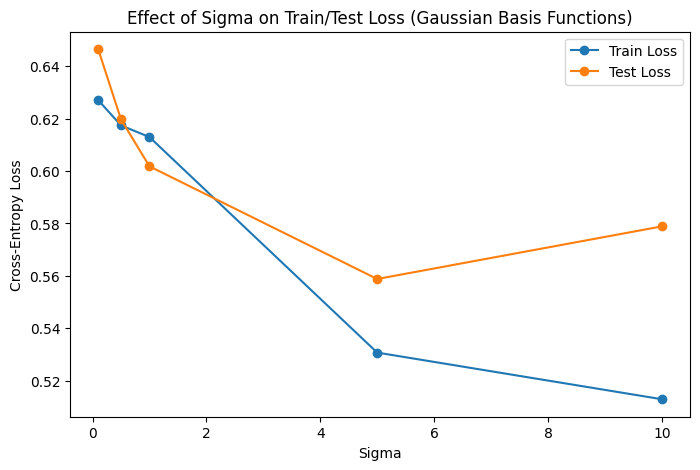

In [17]:
# Plot training and testing error vs sigma
plt.figure(figsize=(8,5))
plt.plot(sigmas, train_loss_sigma, marker='o', label='Train Loss')
plt.plot(sigmas, test_loss_sigma, marker='o', label='Test Loss')
plt.xlabel('Sigma')
plt.ylabel('Cross-Entropy Loss')
plt.title('Effect of Sigma on Train/Test Loss (Gaussian Basis Functions)')
plt.legend()
plt.show()



*   sigma = 0.1: Both training and testing errors are high. The narrow basis functions likely lead to an inability to capture the underlying patterns in the data, resulting in underfitting.

*   sigma = 0.5: The training error decreases significantly, and the testing error is the lowest among the tested sigma values. This suggests a good balance between fitting the training data and generalizing to unseen data.

*   sigma = 1: The testing error is slightly higher than at sigma = 0.5, but still relatively low. The model is still generalizing reasonably well.

*   sigma = 5 and 10: The training error continues to decrease, indicating the model is fitting the training data better. However, the testing error starts to increase, suggesting that the model is beginning to overfit. The wider basis functions might be making the features less distinct, reducing the model's ability to discriminate between classes on unseen data.




(g) Add in all the basis function and perform regularized regression with the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy error for the training data and the testing data, as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different graph the L2 norm of the weights for the set of basis functions corresponding to each value of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# List of sigma values
sigmas = [0.1, 0.5, 1, 5, 10]

# Regularization parameters
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]

# Step 1: create full Gaussian basis features for all σ
X_train_all = np.hstack([gaussian_basis(X_train.values, sigma=s) for s in sigmas])
X_test_all  = np.hstack([gaussian_basis(X_test.values,  sigma=s) for s in sigmas])

# Lists to store results
train_loss_list = []
test_loss_list = []
weight_norm_list = []
weight_norm_per_sigma = {s: [] for s in sigmas}

num_features_per_sigma = gaussian_basis(X_train.values, sigma=sigmas[0]).shape[1]

for lam in lambdas:
    if lam == 0:
        model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=2000)
    else:
        C = 1 / lam
        model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=2000)

    model.fit(X_train_all, y_train)

    # Predict
    y_train_prob = model.predict_proba(X_train_all)[:,1]
    y_test_prob  = model.predict_proba(X_test_all)[:,1]

    # Cross-entropy loss
    train_loss_list.append(log_loss(y_train, y_train_prob))
    test_loss_list.append(log_loss(y_test, y_test_prob))

    # Full L2 norm of weight vector
    w = model.coef_.flatten()
    weight_norm_list.append(np.linalg.norm(w))

    # L2 norm per sigma block
    for i, s in enumerate(sigmas):
        start = i * num_features_per_sigma
        end   = start + num_features_per_sigma
        weight_norm_per_sigma[s].append(np.linalg.norm(w[start:end]))

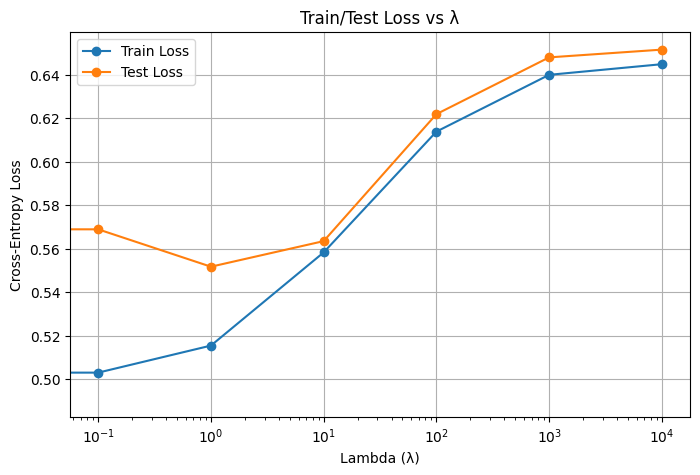

In [56]:
# Cross-entropy loss
plt.figure(figsize=(8,5))
plt.plot(lambdas, train_loss_list, marker='o', label='Train Loss')
plt.plot(lambdas, test_loss_list, marker='o', label='Test Loss')
plt.xscale('log')
plt.xlabel('Lambda (λ)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Train/Test Loss vs λ')
plt.legend()
plt.grid(True)
plt.show()


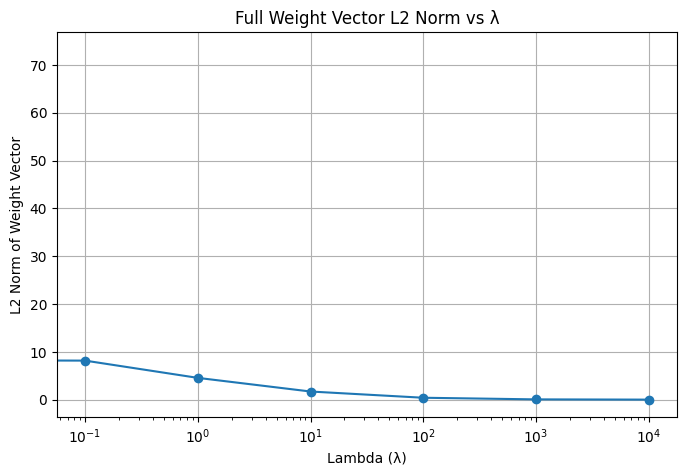

In [57]:
# Full weight L2 norm
plt.figure(figsize=(8,5))
plt.plot(lambdas, weight_norm_list, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (λ)')
plt.ylabel('L2 Norm of Weight Vector')
plt.title('Full Weight Vector L2 Norm vs λ')
plt.grid(True)
plt.show()

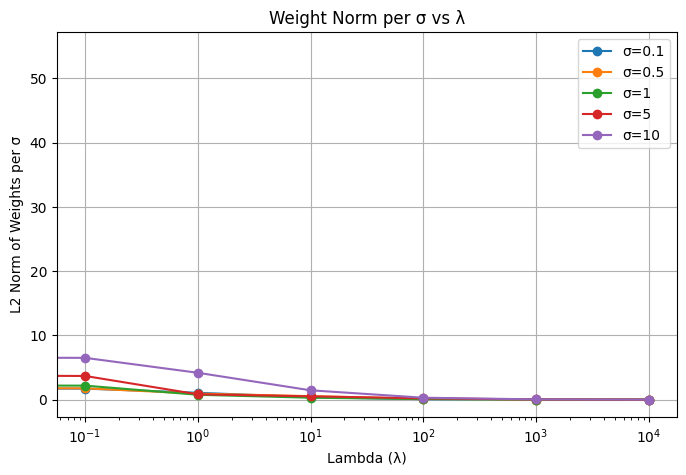

In [21]:
# Weight L2 norm per σ
plt.figure(figsize=(8,5))
for s in sigmas:
    plt.plot(lambdas, weight_norm_per_sigma[s], marker='o', label=f'σ={s}')
plt.xscale('log')
plt.xlabel('Lambda (λ)')
plt.ylabel('L2 Norm of Weights per σ')
plt.title('Weight Norm per σ vs λ')
plt.legend()
plt.grid(True)
plt.show()

Train/Test Loss vs. Lambda:

*   Small λ (0.1-10): The training loss increases slightly as λ increases, indicating that the regularization is starting to penalize the model complexity. The test loss remains relatively low, suggesting a good balance between fitting the training data and generalizing to unseen data.

*   Large λ (100-10000): Both the training and test loss increase sharply as λ increases significantly. This indicates severe underfitting, where the strong regularization forces the model weights towards zero, making the model too simple to capture the patterns in the data.

Full Weight Vector L2 Norm vs. Lambda:

*   This plot clearly shows the effect of L2 regularization. As λ increases, the L2 norm of the weight vector decreases sharply, confirming that the regularization is shrinking the weights towards zero.

Weight Norm per σ vs. Lambda:

*   For smaller σ values (narrower basis functions), the initial weight norm (at small λ) tends to be higher, suggesting that these basis functions contribute more to the model's complexity when regularization is weak.

*   As λ increases, the weight norms for all σ values decrease, indicating that the regularization is reducing the contribution of all sets of basis functions to the model. The weights corresponding to basis functions with larger σ seem to be less affected by regularization at smaller lambda values compared to those with smaller sigma.



(h) Explain what you would need to do if you wanted to design a set of Gaussian basis functions that capture relationships between the inputs. Explain the impact of this choice on the bias-variance trade-off. No experiments are needed (although you are welcome to explore this on your own).

Designing Gaussian basis functions to capture relationships between

inputs:

Instead of only univariate Gaussians for each feature, create multivariate Gaussian basis functions that depend on multiple features at once.
More generally, you could use full covariance matrices to model interactions between features.
This allows the model to capture nonlinear interactions between inputs that univariate Gaussians cannot.
Impact on bias-variance trade-off:

Bias decreases because the model can now fit more complex patterns in the data.
Variance increases because more parameters and interactions make the model more flexible and prone to overfitting.
Stronger regularization (e.g., larger lambda in L2) may be necessary to control variance while maintaining low bias.
Summary: Using multivariate Gaussian bases improves the model's ability to capture complex feature relationships, but it increases the risk of overfitting, so careful selection of σ and regularization is crucial.

2. Experiment on any complex datasets to demonstrate the Linear REGRESSION and its versions, and
logistic regression (CLASSIFICATION) along with complete data preprocessing steps.

Linear Regression

In [22]:
df = pd.read_csv("/content/drive/MyDrive/MLLAB DATASETS/heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [23]:
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df = df.drop(columns=['dataset'])

In [24]:
df.dtypes

,0
id,int64
age,int64
sex,int64
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64
exang,object


In [25]:
columns_with_missing_values = ['sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
for column in columns_with_missing_values:
    if column in df.columns:
        df[column] = df[column].fillna(0)

In [26]:
df.isnull().sum()

,0
id,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0


Simple Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df[['age']]
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

simple_linear = LinearRegression()
simple_linear.fit(X_train, y_train)

y_predict = simple_linear.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mse)

print("Simple Linear Regression Evaluation:")
print("MSE :", mse)
print("MAE :", mae)
print("RMSE:", rmse)

Simple Linear Regression Evaluation:
MSE : 1.0906098144005119
MAE : 0.8409632348175203
RMSE: 1.0443226581859228


In [28]:
print("Intercept (b0):", simple_linear.intercept_)
print("Slope (b1):", simple_linear.coef_[0])

Intercept (b0): -1.1461817055532593
Slope (b1): 0.039525912101022555


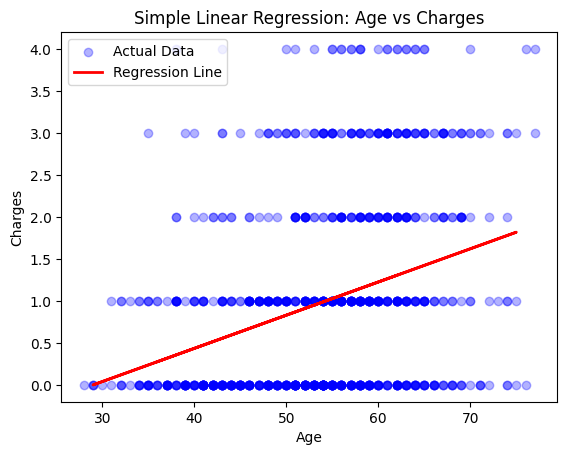

In [29]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', alpha=0.3, label='Actual Data')

plt.plot(X_test, y_predict, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Simple Linear Regression: Age vs Charges')
plt.legend()
plt.show()

Multi Linear Regression

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/MLLAB DATASETS/heart_disease_uci.csv")
df.dropna(inplace=True)

numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('num')
if 'id' in numerical_features:
    numerical_features.remove('id')

X = df[numerical_features]
y = df["num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_linear_model = LinearRegression()
multi_linear_model.fit(X_train, y_train)

y_pred = multi_linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)

print("Multiple Linear Regression Results :")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

Multiple Linear Regression Results :
MSE: 0.8973171206848852
RMSE: 0.9472682411465536
MAE: 0.6761736556534881


In [51]:
print("Intercept (b0):", multi_linear_model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, multi_linear_model.coef_):
    print(f"  {feature}: {coef}")

Intercept (b0): 2.465863725458641
Coefficients:
  age: -0.01522403581258641
  trestbps: 0.005891033816456583
  chol: 0.0008327748885757907
  thalch: -0.015746640144561258
  oldpeak: 0.30893529832205513
  ca: 0.5179688898663194


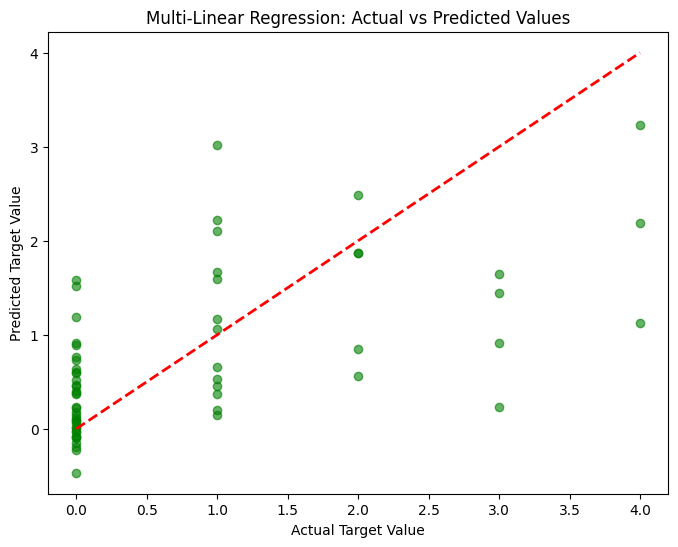

In [52]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Target Value")
plt.ylabel("Predicted Target Value")
plt.title("Multi-Linear Regression: Actual vs Predicted Values")
plt.show()

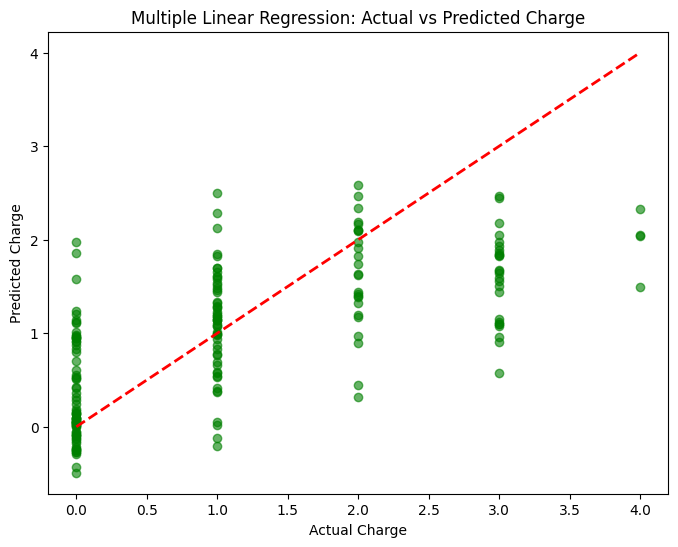

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Charge")
plt.ylabel("Predicted Charge")
plt.title("Multiple Linear Regression: Actual vs Predicted Charge")
plt.show()

Polynomial Regression

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/MLLAB DATASETS/diabetes_DT.csv")
X = df[['BMI']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# include_bias=False to avoid adding a column of ones, as the LinearRegression model handles the intercept
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)

print("Simple Polynomial Regression Evaluation (using 'BMI' feature, degree 2):")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

Simple Polynomial Regression Evaluation (using 'BMI' feature, degree 2):
MSE: 0.21550327698696206
RMSE: 0.4642233050881462
MAE: 0.42536689993924237


In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/MLLAB DATASETS/diabetes_DT.csv")

X = df[['BMI']]
y = df['Outcome'] # Use 'Outcome' for binary classification

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error", mse ** (1/2))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Mean Squared Error: 0.21385855456456926
Root Mean Squared Error 0.4624484344925056
Mean Absolute Error: 0.41920537972059724


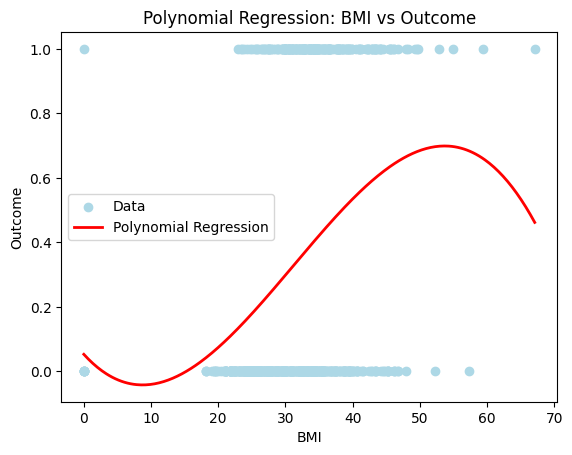

In [35]:
plt.scatter(X_train['BMI'], y_train, color="lightblue", label="Data")
X_range = np.linspace(X['BMI'].min(), X['BMI'].max(), 300).reshape(-1,1)
X_range_df = pd.DataFrame(X_range, columns=['BMI'])
X_range_poly = poly.transform(X_range_df)
y_range_pred = model.predict(X_range_poly)
plt.plot(X_range, y_range_pred, color="red", linewidth=2, label="Polynomial Regression")
plt.xlabel("BMI")
plt.ylabel("Outcome") # Changed ylabel to Outcome
plt.title("Polynomial Regression: BMI vs Outcome")
plt.legend()
plt.show()

Logistic Regression

In [36]:
df = pd.read_csv("/content/drive/MyDrive/MLLAB DATASETS/diabetes_DT.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:

X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6233766233766234

Confusion Matrix:
 [[85 15]
 [43 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.85      0.75       100
           1       0.42      0.20      0.28        54

    accuracy                           0.62       154
   macro avg       0.54      0.53      0.51       154
weighted avg       0.58      0.62      0.58       154



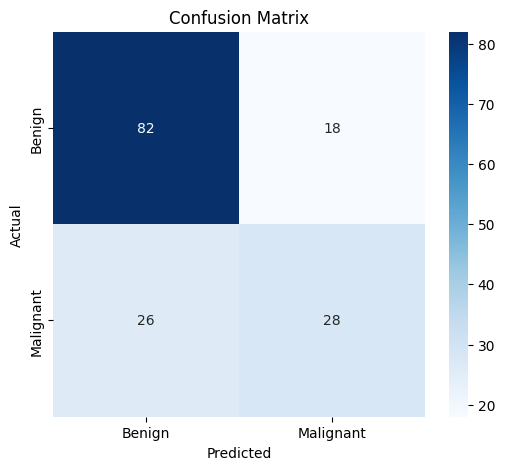

In [39]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()